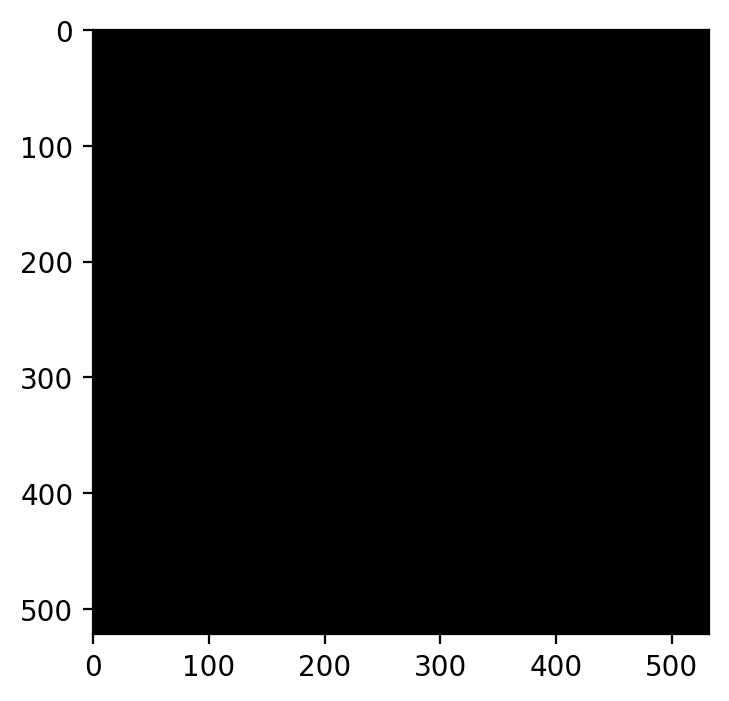

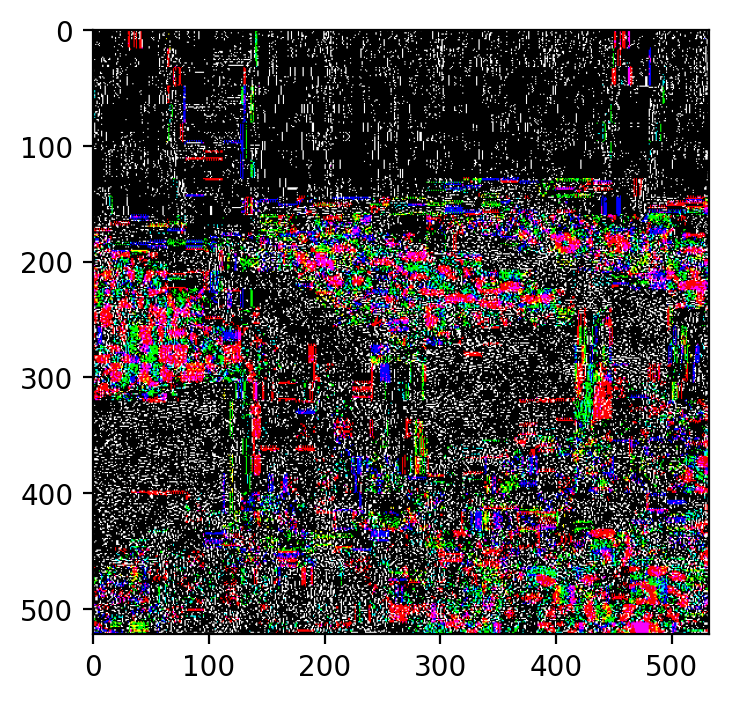

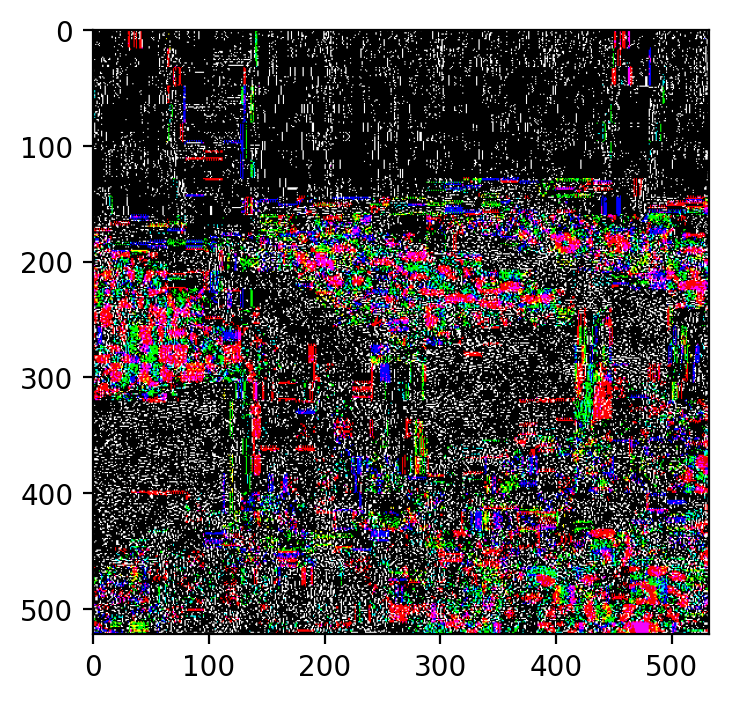

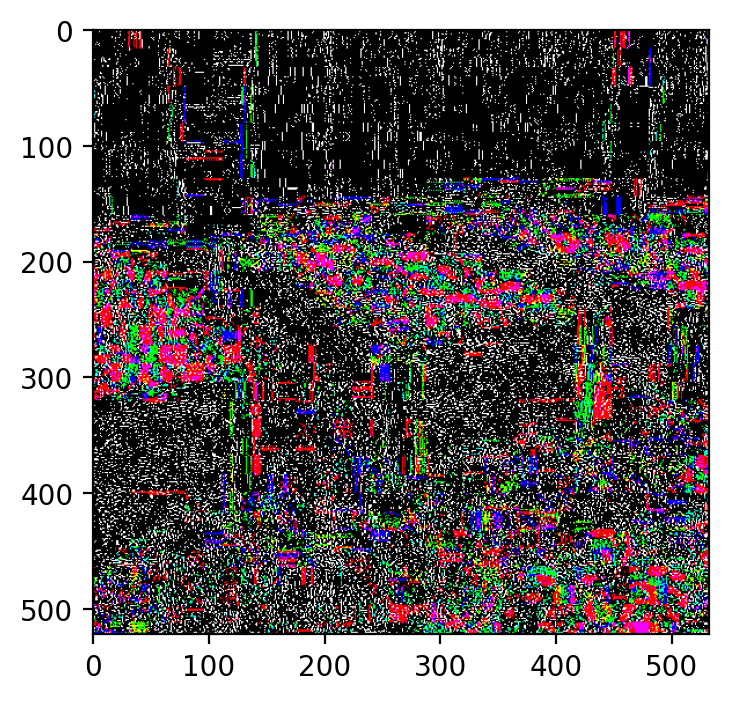

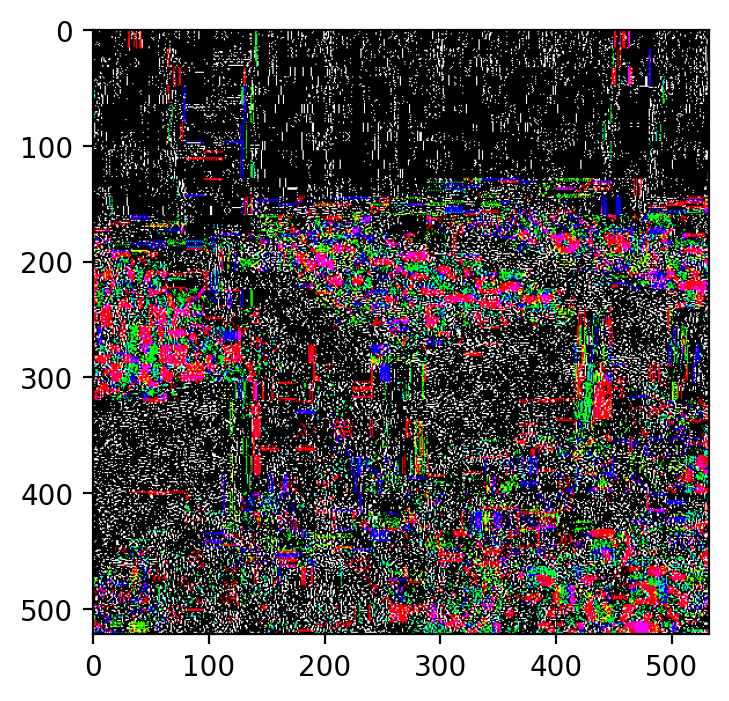

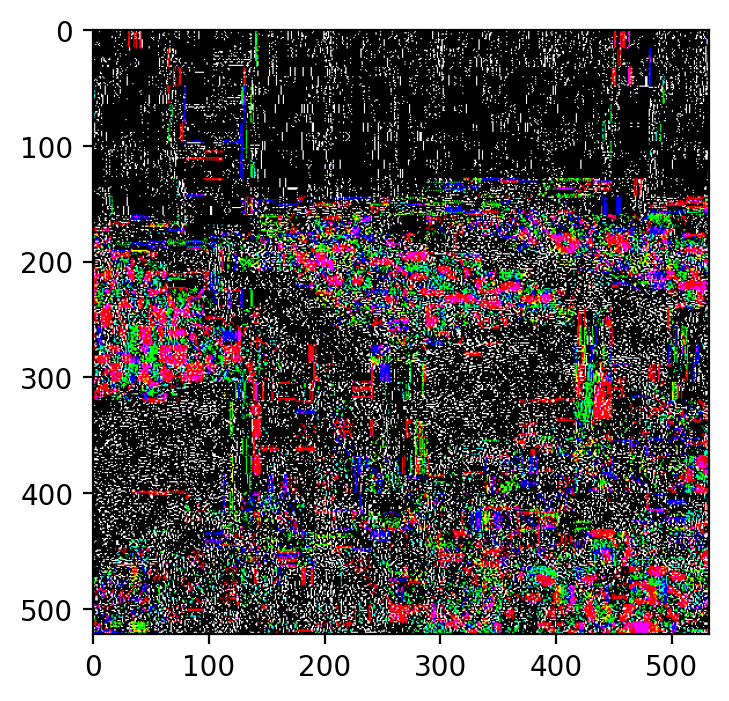

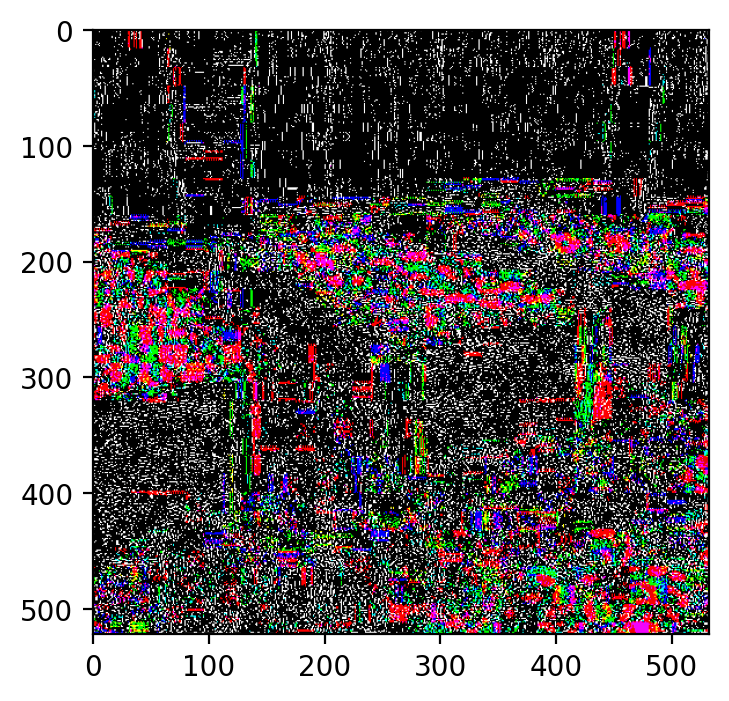

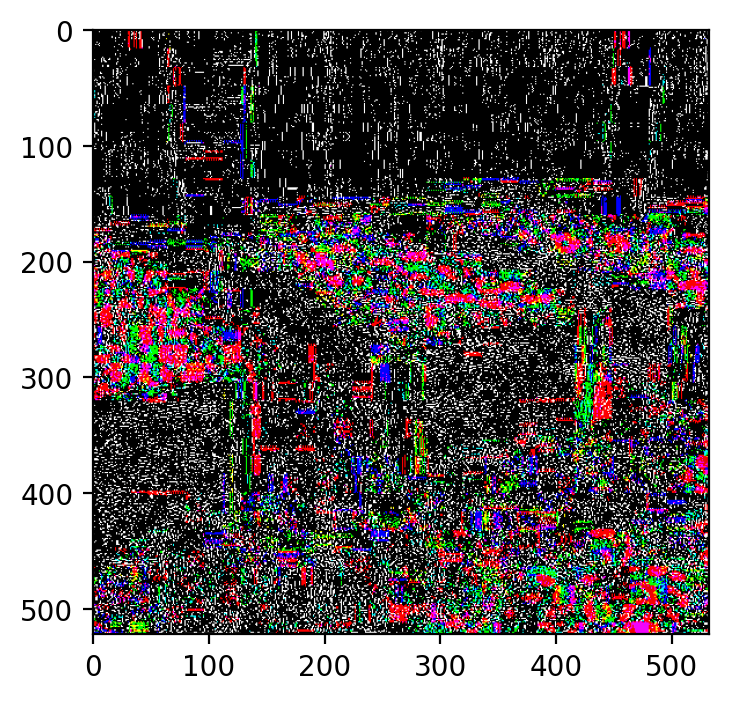

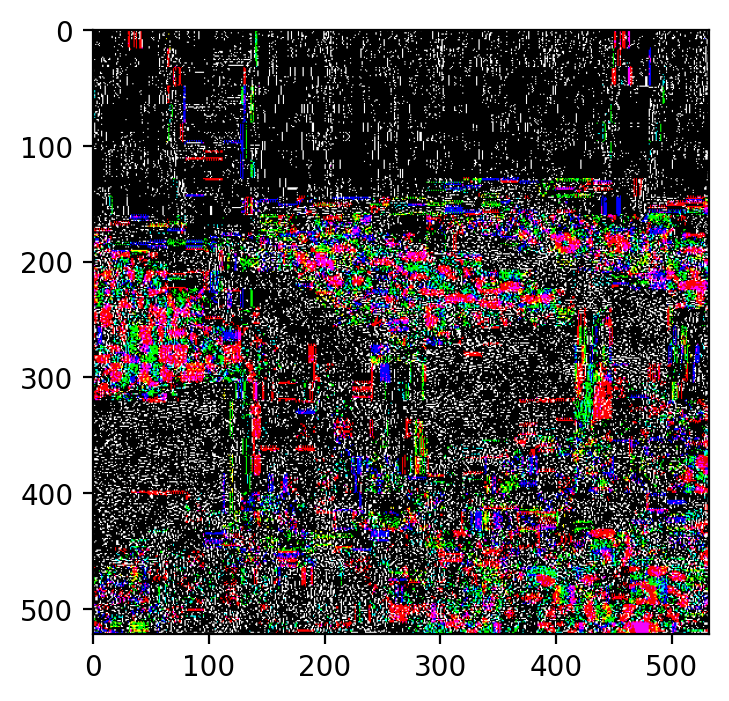

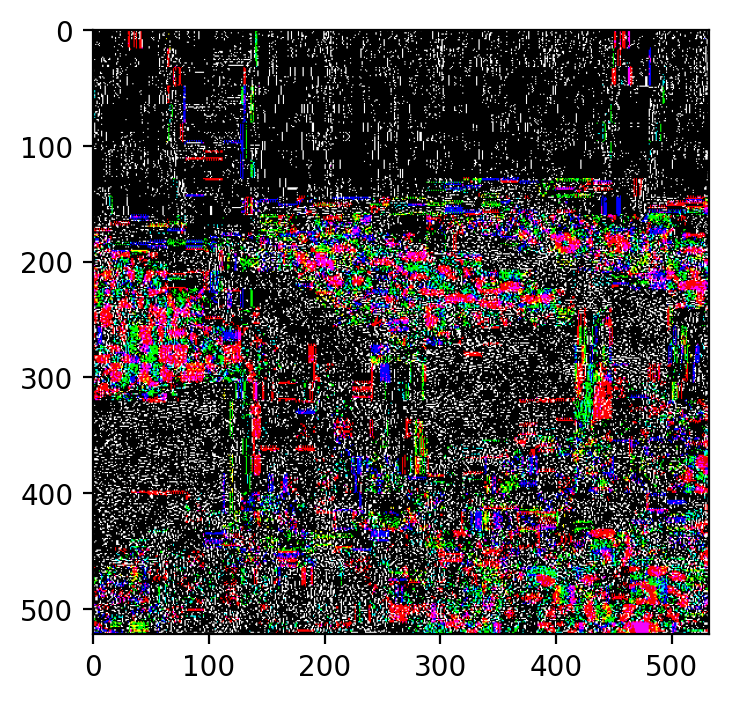

In [10]:
import cv2
import einops
from matplotlib import pyplot as plt
import numpy as np
from torchvision.io import encode_jpeg


def simulate_jpeg_compression(image: np.ndarray, number_of_passes: int, jpeg_quality: int = 90):
    compressed_image = image.copy()
    *_, encoded = cv2.imencode(".jpg", compressed_image, [cv2.IMWRITE_JPEG_QUALITY, jpeg_quality])
    return cv2.imdecode(encoded, 1)


def fourier_transform_method(image):
    pass

In [ ]:
from collections import namedtuple
import glob
import os
import random

import torch
import torch.utils.data as data


RandomMinMax = namedtuple("RandomMinMax", ["min", "max"])


class SimpleClassificationDataset(data.Dataset):
    
    def __init__(self, image_folder, transforms, compression_probability: float = 0.5, jpeg_quality: RandomMinMax = RandomMinMax(min=20, max=95)):
        self.images = glob.glob(os.path.join(image_folder, "*"))
        self.transforms = transforms
        self.compression_probability = compression_probability
        self.jpeg_quality = jpeg_quality
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, item):
        image = cv2.imread(self.images[item])
        if is_compression := (random.random() < self.compression_probability):
            compression_level = random.randint(self.jpeg_quality.min, self.jpeg_quality.max)
            image = simulate_jpeg_compression(image, jpeg_quality=compression_level)
        image = self.transforms(image)
        return image, torch.tensor([is_compression]).long()